# Decision tree for the drug  

In [3]:
#  import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline

In [5]:
# load the dataset
data=pd.read_csv("drug200.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [11]:
# labelEncoder
label_encoder=LabelEncoder()
data['Sex']=label_encoder.fit_transform(data["Sex"])
data["BP"]=label_encoder.fit_transform(data["BP"])
data["Cholesterol"]=label_encoder.fit_transform(data["Cholesterol"])

In [12]:
# checking if there are any missing values in the dataset
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [13]:
# labeling of the drug names
custom_map={'drugA':0, 'drugB':1, 'drugC':2, "drugX":3, "drugY":4}
data['Drug_num']=data['Drug'].map(custom_map)
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC,2
196,16,1,1,0,12.006,drugC,2
197,52,1,2,0,9.894,drugX,3
198,23,1,2,1,14.020,drugX,3


In [14]:
# the correlation of the input variables with the target variables drug_num
data.drop('Drug',axis=1).corr()['Drug_num']

Age           -0.004828
Sex           -0.098573
BP             0.372868
Cholesterol    0.055629
Na_to_K        0.589120
Drug_num       1.000000
Name: Drug_num, dtype: float64

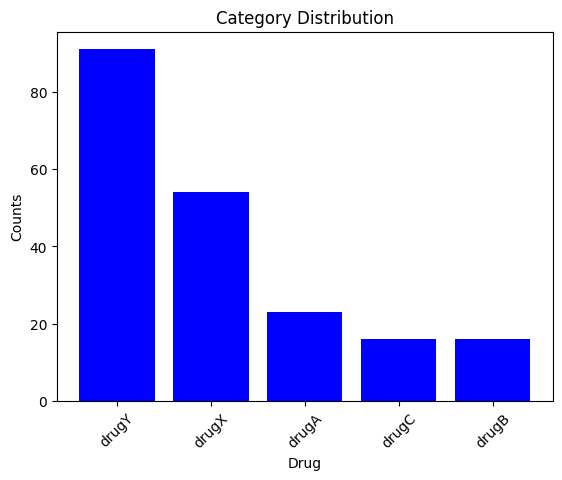

In [16]:
# we can also understand the distribution of the dataset by plotting the count of the records with each drug recommendation
category_counts= data['Drug'].value_counts()

# plot the count plot
plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xlabel('Drug')
plt.ylabel('Counts')
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.show()

# Modeling

In [17]:
y=data['Drug']
X=data.drop(['Drug', 'Drug_num'], axis=1)

In [18]:
# split the dataset into train test, 70:30
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=17)

In [19]:
drug_tree= DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
drug_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Evaluation

In [21]:
tree_predictions=drug_tree.predict(X_test)

In [23]:
print("Decision Trees's accuracy:", metrics.accuracy_score(y_test, tree_predictions))

Decision Trees's accuracy: 0.9666666666666667


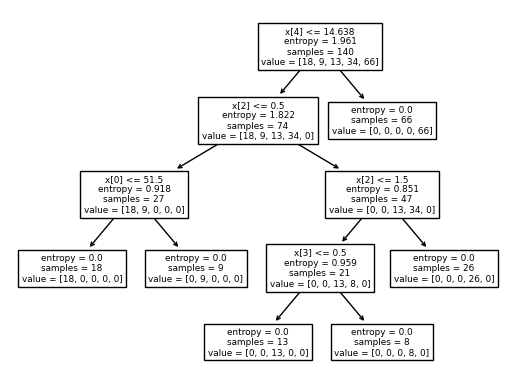

In [24]:
# visualize the tree
plot_tree(drug_tree)
plt.show()